# 기초통계(1)
- 01 확률의 관점 - 빈도주의와 베이지안, 베이즈 정리
- 02 확률적 모델링을 위한 확률론 - 이산확률분포와 연속확률분포, 모수 추정 과정
- 03 몬테카를로 - 몬테카를로 개념
- 04 회귀분석 - 회귀분석, 단순 선형 회귀 분석, 회귀 진단


## 01 빈도주의와 베이지안
- 빈도주의 : 사건의 빈도
- 베이지안 : 주장에 대한 신뢰도
- 베이즈 정리 : 사전확률과 사후확률의 관계

## 02 확률적 모델링을 위한 확률론
- 이산확률분포 : 셀수 있는 경우 (베르누이 분포, 이항분포, 포아송)
  - 베르누이 분포 = 성공 or 실패
  - 이항 분포 = 베르누이 n번 반복, k번 성공할 확률
  - 포아송 분포 = 단위시간/공간 어떤 사건이 몇 번 발생
- 연속확률분포 : 연속적인 실수인 경우 (정규 분포, 지수 분포, 감마 분포)
  - 정규 분포 = 데이터가 평균을 중심으로 대칭 분포
  - 지수 분포 = 특정 사건이 발생할 때까지의 대기 시간이나 간격
  - 감마 분포 = 지수분포의 합

- MLE(최대우도법) <- 계산된 우도값 중 가장 큰 값을 고르는 방법

### 03 몬테카를로

몬테카를로 = 시뮬레이션 (랜덤 추출을 통해 함수값 근사)

## 1. 데이터 로드 및 검토

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Q1

In [ ]:
# 데이터 로드
data = pd.read_csv("bacteria.csv")

In [ ]:
# 데이터 확인
data.head()

,t,nt
0,1,355
1,2,211
2,3,197
3,4,166
4,5,142


In [ ]:
# 데이터 크기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   t       15 non-null     int64
 1   nt      15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


## 04 회귀 분석

회귀분석 = 설명변수(X)에 대응하는 반응변수(Y)와 가장 비슷한 값을 출력하는 함수를 찾는 과정

선형회귀분석 = 반응변수와 한 개 이상의 설명변수와의 선형 상관관계를 모델링하는 회귀분석 기법

1.선형성

종속 변수 Y와 독립 변수 X간에 선형 관계가 있다는 것


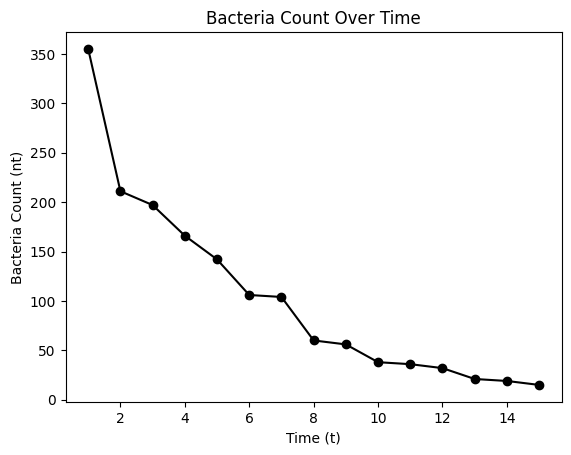

In [ ]:
# 데이터 추세 파악
plt.plot(data['t'], data['nt'], marker='o', linestyle='-', color='black')
plt.xlabel('Time (t)')
plt.ylabel('Bacteria Count (nt)')
plt.title('Bacteria Count Over Time')
plt.show()

3.등분산성
= 독립 변수 X의 값에 대해 종속 변수 Y의 분산이 일정하다는 것을 의미

## 2. 초기 데이터와 잔차 플롯 확인

In [ ]:
# 초기 회귀 모델 적합
model = LinearRegression()
model.fit(data[['t']], data['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()

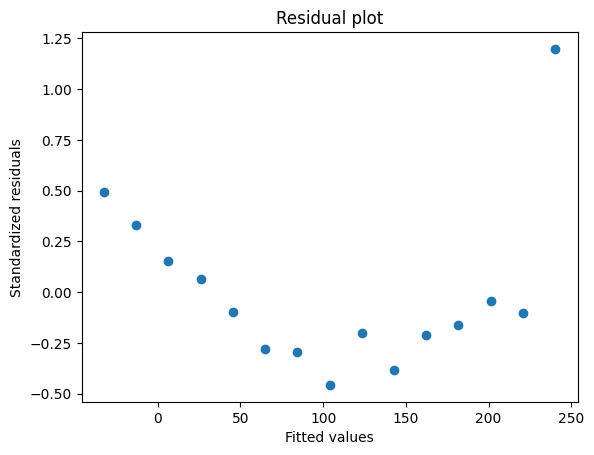

In [ ]:
# 잔차 플롯
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

bacteria 데이터에 단순 회귀 모형을 적용하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

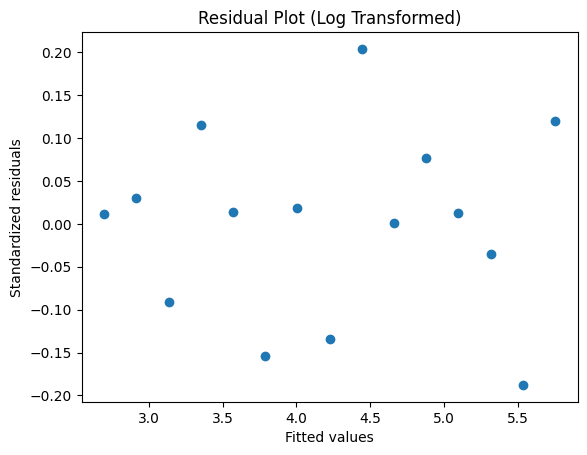

In [ ]:
# ans :
# 반응 변수에 로그 변환 적용
data['log_nt'] = np.log(data['nt'])

# 변환된 데이터로 회귀 모델 적합
model_log = LinearRegression()
model_log.fit(data[['t']], data['log_nt'])

# 예측값과 표준화 잔차 계산 (로그 변환된 데이터)
fitted_values_log = model_log.predict(data[['t']])
standardized_residuals_log = (data['log_nt'] - fitted_values_log) / data['log_nt'].std()

# 잔차 플롯 (로그 변환된 데이터)
plt.scatter(fitted_values_log, standardized_residuals_log)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot (Log Transformed)')
plt.show()


   t   nt
0  1  355
1  2  211
2  3  197
3  4  166
4  5  142
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   t       15 non-null     int64
 1   nt      15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes
None


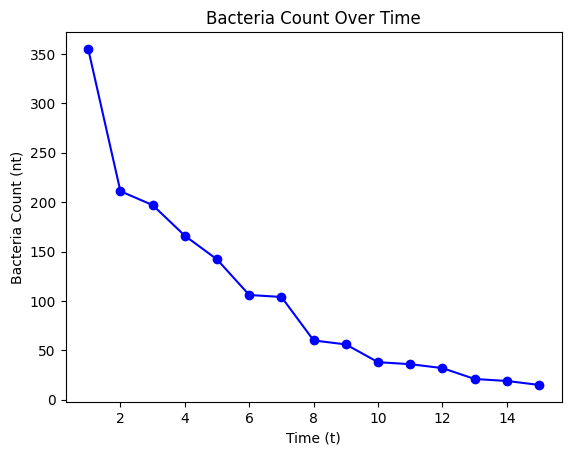

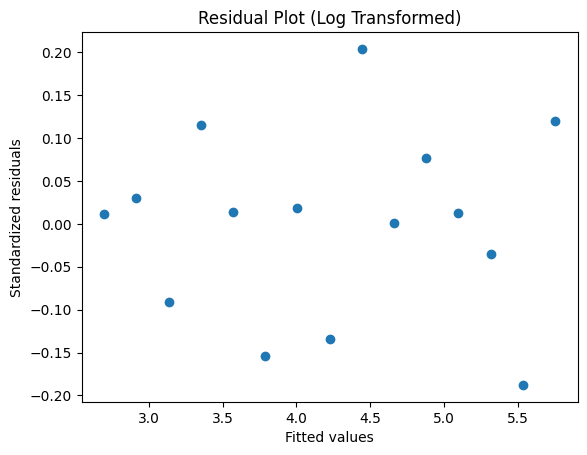

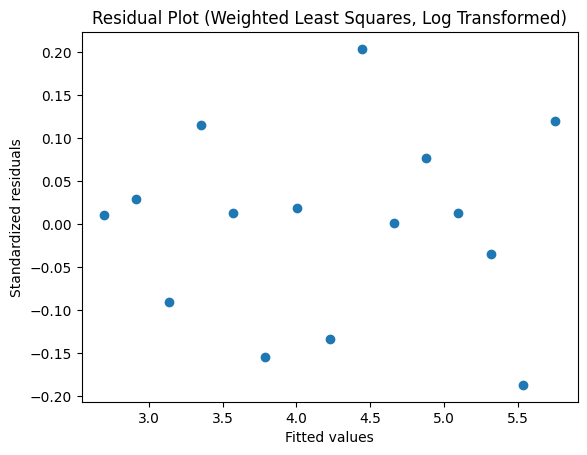

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 데이터 로드
data = pd.read_csv('bacteria.csv')

# 데이터 확인
print(data.head())
print(data.info())

# 초기 데이터 플롯
plt.plot(data['t'], data['nt'], marker='o', linestyle='-', color='b')
plt.xlabel('Time (t)')
plt.ylabel('Bacteria Count (nt)')
plt.title('Bacteria Count Over Time')
plt.show()

# 로그 변환을 반응 변수에 적용
data['log_nt'] = np.log(data['nt'])

# 로그 변환된 데이터로 회귀 모델 적합
model_log = LinearRegression()
model_log.fit(data[['t']], data['log_nt'])

# 예측값과 표준화 잔차 계산 (로그 변환된 데이터)
fitted_values_log = model_log.predict(data[['t']])
standardized_residuals_log = (data['log_nt'] - fitted_values_log) / data['log_nt'].std()

# 잔차 플롯 (로그 변환된 데이터)
plt.scatter(fitted_values_log, standardized_residuals_log)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot (Log Transformed)')
plt.show()

# 상수항 추가
data['constant'] = 1

# 가중치를 로그 변환된 예측값으로 설정
weights_log = 1 / np.where(fitted_values_log == 0, np.finfo(float).eps, fitted_values_log)

# 가중 최소제곱법(WLS) 모델 적합
wls_model_log = sm.WLS(data['log_nt'], data[['constant', 't']], weights=weights_log).fit()

# 예측값과 표준화 잔차 계산 (WLS 모델, 로그 변환된 데이터)
fitted_values_wls_log = wls_model_log.predict(data[['constant', 't']])
standardized_residuals_wls_log = (data['log_nt'] - fitted_values_wls_log) / data['log_nt'].std()

# 잔차 플롯 (WLS 모델, 로그 변환된 데이터)
plt.scatter(fitted_values_wls_log, standardized_residuals_wls_log)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual Plot (Weighted Least Squares, Log Transformed)')
plt.show()


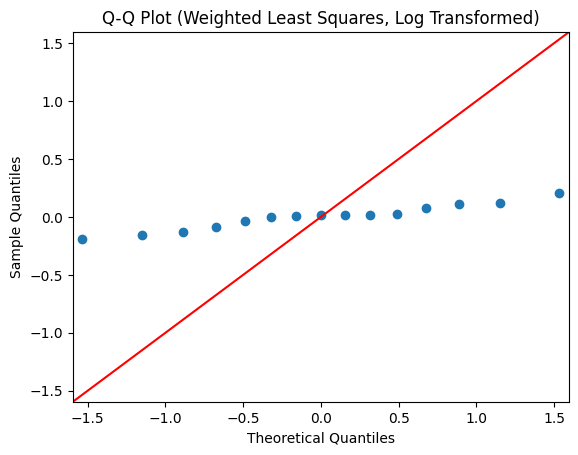

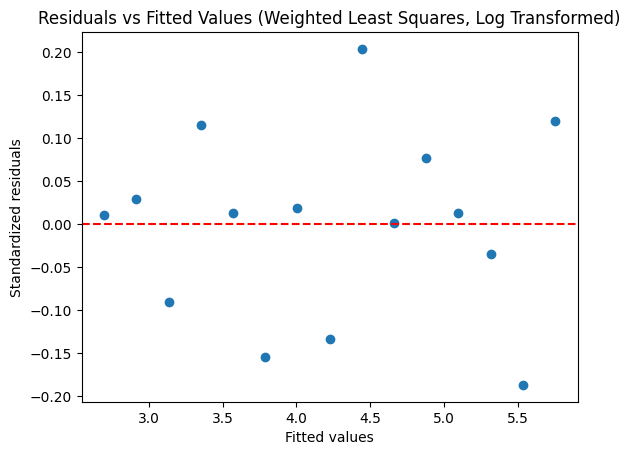

In [ ]:
import scipy.stats as stats

# Q-Q 플롯
sm.qqplot(standardized_residuals_wls_log, line='45')
plt.title('Q-Q Plot (Weighted Least Squares, Log Transformed)')
plt.show()

# 잔차 vs 피팅된 값 플롯
plt.scatter(fitted_values_wls_log, standardized_residuals_wls_log)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Fitted Values (Weighted Least Squares, Log Transformed)')
plt.show()


### Q2

In [ ]:
# 데이터 로드
data2 = pd.read_csv("artificial1.csv")

In [ ]:
data2.head()

,X,Y
0,11.0142,24.8831
1,2.7066,14.7374
2,11.5839,64.0250
3,8.9989,16.1965
4,2.1201,7.3907


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
# 선형 회귀 모형 적합
result1 = smf.ols('Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result1.predict()
standardized_residuals = result1.get_influence().resid_studentized_internal

- 종속 변수(Dep. Variable): Y
- 독립 변수(Independent Variable): X
- 회귀 모델(Model): OLS (Ordinary Least Squares) - 일반적인 최소제곱법을 사용한 회귀 분석

In [ ]:
# 요약 정보 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.69
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           5.44e-08
Time:                        14:32:45   Log-Likelihood:                -352.93
No. Observations:                 100   AIC:                             709.9
Df Residuals:                      98   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0482      2.324      2.602      0.0

주어진 회귀 분석 결과를 해석해 보겠습니다.

### 모델 개요
- **종속 변수(Dep. Variable)**: Y
- **독립 변수(Independent Variable)**: X
- **회귀 모델(Model)**: OLS (Ordinary Least Squares) - 일반적인 최소제곱법을 사용한 회귀 분석

### 주요 결과 해석

1. **R-squared (결정 계수)**: 0.261
   - 모델이 종속 변수 Y의 변동성 중 약 26.1%를 설명한다는 것을 의미합니다. R-squared 값은 0과 1 사이의 값으로, 1에 가까울수록 모델이 데이터를 잘 설명합니다.

2. **Adj. R-squared (조정된 결정 계수)**: 0.254
   - R-squared 값을 독립 변수의 개수에 따라 조정한 값입니다. 모델의 설명력을 평가할 때 사용됩니다.

3. **F-statistic (F-통계량)**: 34.69
   - 모델 전체의 유의성을 평가합니다. 높은 값일수록 모델이 유의미하다는 것을 나타냅니다.

4. **Prob (F-statistic)**: 5.44e-08
   - F-통계량에 대한 p-값으로, 매우 낮은 값(0.05 미만)이므로 모델이 통계적으로 유의미함을 나타냅니다.

### 회귀 계수(Coefficients)

- **Intercept (절편)**: 6.0482
  - X가 0일 때 Y의 예상값입니다.
  - p-값(P>|t|)이 0.011로, 통계적으로 유의미합니다(0.05 미만).

- **X의 계수(Coefficient)**: 1.7254
  - X가 한 단위 증가할 때 Y가 1.7254 단위 증가함을 의미합니다.
  - p-값(P>|t|)이 0.000로, 통계적으로 매우 유의미합니다(0.05 미만).

### 진단 통계량

- **Omnibus**: 23.982 (Prob(Omnibus): 0.000)
  - 잔차가 정규 분포를 따르는지 테스트합니다. p-값이 0.05 미만이므로, 잔차가 정규 분포를 따르지 않을 가능성이 높습니다.

- **Durbin-Watson**: 2.279
  - 잔차의 자기 상관을 테스트합니다. 값이 2에 가까울수록 자기 상관이 없음을 의미합니다. 2.279는 거의 자기 상관이 없음을 나타냅니다.

- **Jarque-Bera (JB)**: 61.074 (Prob(JB): 5.47e-14)
  - 잔차의 정규성을 테스트합니다. p-값이 매우 낮으므로 잔차가 정규 분포를 따르지 않습니다.

- **Skew (왜도)**: 0.817
  - 잔차의 비대칭 정도를 나타냅니다. 양수 값이므로 오른쪽으로 꼬리가 긴 분포입니다.

- **Kurtosis (첨도)**: 6.463
  - 잔차 분포의 꼬리 두께를 나타냅니다. 3보다 큰 값이므로 꼬리가 두꺼운 분포입니다.

### 요약
- 모델이 통계적으로 유의미하며, X가 Y에 미치는 영향도 통계적으로 유의미합니다.
- 그러나 잔차가 정규 분포를 따르지 않는 등 일부 진단 결과에서 문제가 발견됩니다.
- 모델의 예측력을 높이기 위해 추가적인 변수 포함, 데이터 변환, 또는 다른 회귀 모델을 고려할 수 있습니다.

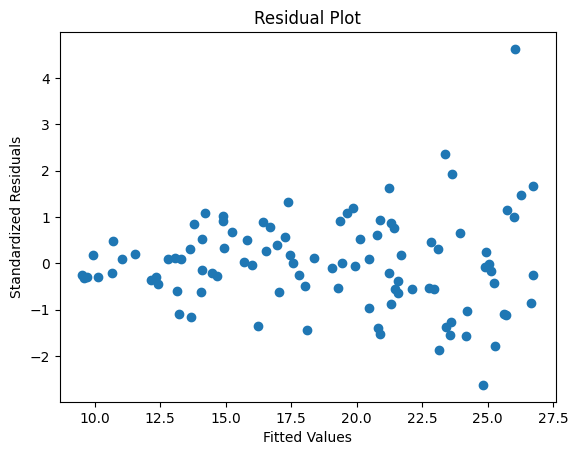

In [ ]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

artificial1데이터에 단순 회귀 모형을 피팅하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

         X        Y
0  11.0142  24.8831
1   2.7066  14.7374
2  11.5839  64.0250
3   8.9989  16.1965
4   2.1201   7.3907
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


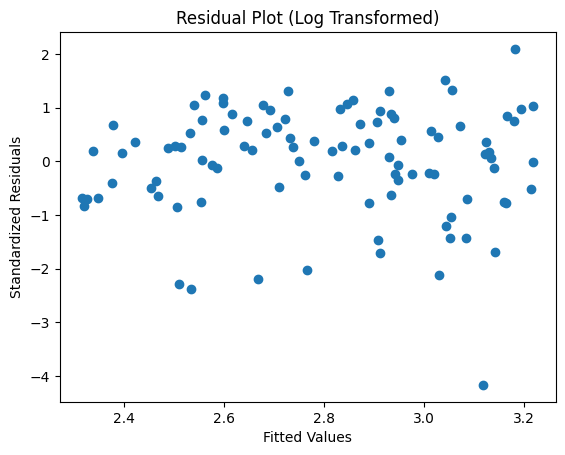

In [ ]:
# ans :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 데이터 로드
data2 = pd.read_csv('artificial1.csv')

# 데이터 확인
print(data2.head())
print(data2.info())

# 로그 변환 적용
data2['log_Y'] = np.log(data2['Y'])

# 로그 변환된 데이터로 회귀 모형 적합
result_log = smf.ols('log_Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values_log = result_log.predict()
standardized_residuals_log = result_log.get_influence().resid_studentized_internal

plt.scatter(fitted_values_log, standardized_residuals_log)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot (Log Transformed)')
plt.show()


         X        Y
0  11.0142  24.8831
1   2.7066  14.7374
2  11.5839  64.0250
3   8.9989  16.1965
4   2.1201   7.3907
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


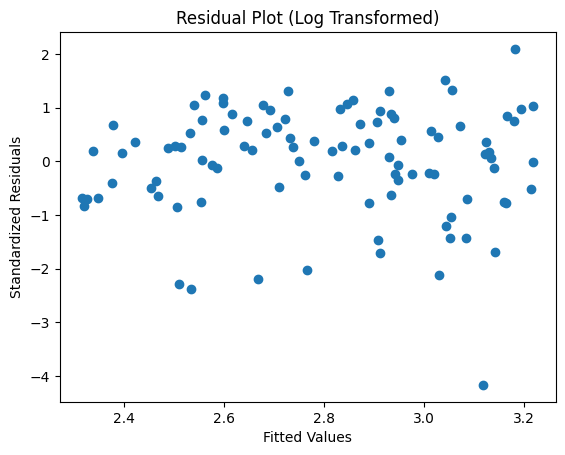

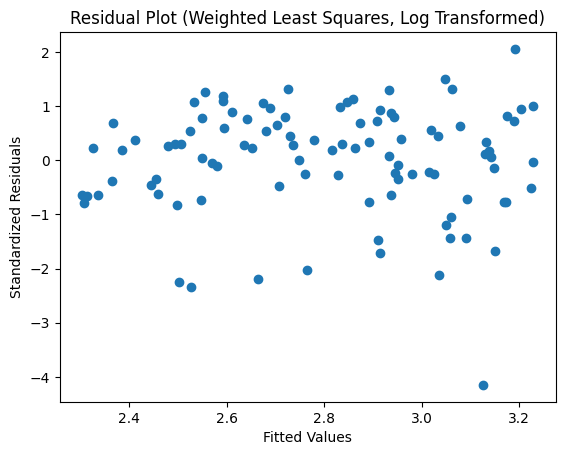

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 데이터 로드
data2 = pd.read_csv('artificial1.csv')

# 데이터 확인
print(data2.head())
print(data2.info())

# 로그 변환 적용
data2['log_Y'] = np.log(data2['Y'])

# 로그 변환된 데이터로 회귀 모형 적합
result_log = smf.ols('log_Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values_log = result_log.predict()
standardized_residuals_log = result_log.get_influence().resid_studentized_internal

plt.scatter(fitted_values_log, standardized_residuals_log)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot (Log Transformed)')
plt.show()

# 상수항 추가
data2['constant'] = 1

# 로그 변환된 예측값으로 가중치 설정
weights_log = 1 / np.where(fitted_values_log == 0, np.finfo(float).eps, fitted_values_log)

# 가중 최소제곱법(WLS) 모델 적합
wls_model_log = sm.WLS(data2['log_Y'], data2[['constant', 'X']], weights=weights_log).fit()

# 예측값 계산 (WLS 모델, 로그 변환된 데이터)
fitted_values_wls_log = wls_model_log.predict(data2[['constant', 'X']])

# 잔차 계산 (WLS 모델, 로그 변환된 데이터)
residuals_wls_log = data2['log_Y'] - fitted_values_wls_log

# 표준화 잔차 계산
standardized_residuals_wls_log = residuals_wls_log / residuals_wls_log.std()

# 잔차 플롯 (WLS 모델, 로그 변환된 데이터)
plt.scatter(fitted_values_wls_log, standardized_residuals_wls_log)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot (Weighted Least Squares, Log Transformed)')
plt.show()


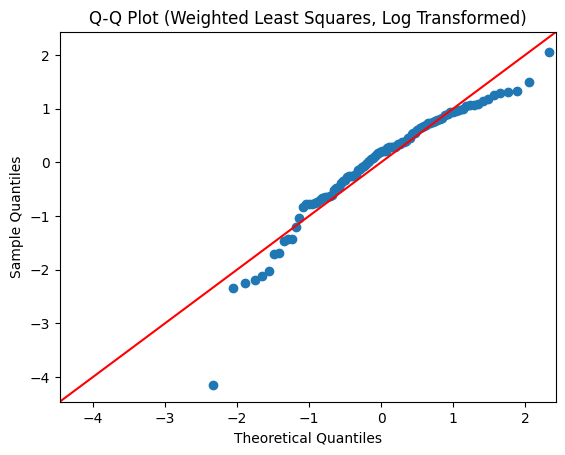

In [ ]:
import scipy.stats as stats

# Q-Q 플롯
sm.qqplot(standardized_residuals_wls_log, line='45')
plt.title('Q-Q Plot (Weighted Least Squares, Log Transformed)')
plt.show()

In [ ]:
# Durbin-Watson 통계량 계산
dw_statistic = sm.stats.durbin_watson(standardized_residuals_wls_log)
print(f'Durbin-Watson statistic: {dw_statistic}')


Durbin-Watson statistic: 2.1980878590687745


### Q3. 단순회귀모델에서 등분산성이 위배되는 것이 문제가 되는 이유가 무엇인지에 대해서 강의 내용을 바탕으로 서술하여주세요.

ans :

### 단순 회귀모델에서 등분산성 위배가 문제가 되는 이유

표준 오차 추정의 부정확성:

등분산성 위배 시 회귀 계수의 표준 오차가 부정확해져, t-검정과 F-검정 등의 통계적 검정 신뢰성이 떨어집니다.
통계 값 신뢰 불가:

표준 오차 추정이 부정확해지면 t-검정과 F-검정 등 통계적 검정 값이 신뢰성을 잃게 됩니다.
모형 평가 지표 왜곡:

등분산성을 만족하지 않으면 OLS 추정량이 비효율적이 되어 모델의 예측력이 떨어지고, 잔차 분석에서 오류 가능성이 증가합니다.